<a href="https://colab.research.google.com/github/Tanuja2725/deeplearning/blob/main/Tabular_data_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th Jan, 2022
# github deeplearning repo
# Ref: https://docs.fast.ai/tutorial.tabular.html
#      https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai
#      https://www.martinalarcon.org/2018-12-31-b-water-pumps/
# Objectives:
#           a) Using fastai to preprocess data
#           b) fastai for developing model
#           c) fast ai for making data ready for other libraries

# Tabular models
To get help on fastai functons use `doc()`.<br>
Reference See [here](https://docs.fast.ai/tutorial.tabular.html)<br>
What are DataLoaders? See [here](https://dirk-kalmbach.medium.com/datablock-and-dataloaders-in-fastai-d5aa7ae560e5) and [here](https://muttoni.github.io/blog/machine-learning/fastai/2020/12/26/datablocks-vs-dataloaders.html)

In [ ]:
# 0.0
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# To see prettier help using doc()
#  Also for creating python packages
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00


## Call libraries

In [ ]:
# 1.0 Call libraries:

from fastai.tabular import *

# For FillMissing, Categorify, Normalize, untar_data
from fastai.tabular.all import *

## Get data

Pathlib module contains useful functions to perform file-related tasks. Pathlib provides a more readable and easier way to build up paths by representing filesystem paths as proper objects and enables us to write code that is portable across platforms.

In [ ]:
# 1.1 untar_data will download data (if not already downloaded)
#      to /root/.fastai/data/adult_sample

path = untar_data(URLs.ADULT_SAMPLE)
path
print("\n=====\n")
path.ls()
print("\n=====\n")
type(path)

Path('/root/.fastai/data/adult_sample')


=====



(#3) [Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/export.pkl')]


=====



pathlib.PosixPath

### About pathlib
See [here](https://stackabuse.com/introduction-to-the-python-pathlib-module/)


    Path.cwd(): Return path object representing the current working directory
    Path.home(): Return path object representing the home directory
    Path.stat(): return info about the path
    Path.chmod(): change file mode and permissions
    Path.glob(pattern): Glob the pattern given in the directory that is represented by the path, yielding matching files of any kind
    Path.mkdir(): to create a new directory at the given path
    Path.open(): To open the file created by the path
    Path.rename(): Rename a file or directory to the given target
    Path.rmdir(): Remove the empty directory
    Path.unlink(): Remove the file or symbolic link


In [ ]:
# 2.0
from pathlib import *


In [ ]:
# 2.1
Path.cwd()
Path.home()

Path('/content')

Path('/root')

In [ ]:
# 2.2 How to buid paths
outpath = Path.cwd() / 'output' / 'output.xlsx'
outpath

Path('/content/output/output.xlsx')

In [ ]:
type(path)

pathlib.PosixPath

In [ ]:
# 2.3
path.is_dir()
path.stat()

True

os.stat_result(st_mode=16893, st_ino=4587675, st_dev=47, st_nlink=3, st_uid=1000, st_gid=1000, st_size=4096, st_atime=1674280618, st_mtime=1543965152, st_ctime=1674280618)

In [ ]:
# 2.4
path.glob("*.csv")

<generator object Path.glob at 0x7f67af766f20>

In [ ]:
# 2.5
for i in path.glob("*.csv"):
  print(i)

/root/.fastai/data/adult_sample/adult.csv


## Read our data

In [ ]:
# 3.0 Read the downloaded dataset 
df = pd.read_csv(path/'adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [ ]:
# 3.1
df.shape   # (32561, 15)

(32561, 15)

In [ ]:
df['education-num'].value_counts()

9.0     10349
10.0     7184
13.0     5277
14.0     1692
11.0     1365
7.0      1153
12.0     1049
6.0       916
4.0       640
15.0      565
5.0       506
8.0       425
16.0      408
3.0       328
2.0       166
1.0        51
Name: education-num, dtype: int64

## Data types & Data processing

In [ ]:
# 3.2 Define some constants:

dep_var = 'salary'    # target
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']


In [ ]:
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,1,2.1,2.4,3.1,NaN]})
to = TabularPandas(df1,[FillMissing,Categorify], cont_names=['a'])


In [ ]:
to.xs.head(6)

,a_na,a
0,2,2.25
1,1,1.00
2,1,2.10
3,1,2.40
4,1,3.10
5,2,2.25


In [ ]:
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,"a","b","a","c",NaN]})
to = TabularPandas(df1,[FillMissing, Categorify], 'a')
to1 = TabularPandas(df1,[FillMissing, Categorify], 'a')
#to.show()

In [ ]:
to.xs.head(10)

,a
0,0
1,1
2,2
3,1
4,3
5,0


In [ ]:
cat = to.procs.categorify
cat.classes


{'a': ['#na#', 'a', 'b', 'c']}

In [ ]:
cat.classes

{'a': ['#na#', 'a', 'b', 'c']}

Processes to operate on data. Refer below for API:<br>
[FillMissing](https://docs.fast.ai/tabular.core.html#fillmissing) will fill the missing values in the continuous variables by the median of existing values (you can choose a specific value if you prefer)<br>
[Categorify](https://docs.fast.ai/tabular.core.html#categorify): Transform the categorical variables to something similar to pd.Categorical<br>
[Normalize](https://docs.fast.ai/data.transforms.html#normalize) will normalize the continuous variables (subtract the mean and divide by the std)<br>


In [ ]:
# 3.3 What all we need to do over this data
#  and in what sequence:

procs = [FillMissing, Categorify, Normalize]

About TabularDataLoaders see [here](https://docs.fast.ai/tabular.data.html#tabulardataloaders.from_csv)<br>
The following code does not give satisfactory results

In [ ]:
# Defaults to 80:20
#dls = TabularDataLoaders.from_csv(
#                                  path / 'adult.csv',
#                                  path=path,
#                                  y_names="salary",
#                                  bs = 64,   # Try 2 or 3
#                                  cat_names = cat_names,
#                                  cont_names = cont_names,
#                                  procs = procs)

Instead proceed as follows:<br>
First split the dataset

In [ ]:
# 4.0 Get two splits of data
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [ ]:
# 4.1 This is what splits object is:
splits

((#26049) [31892,10775,1558,15214,15923,10327,31374,17423,17551,8816...],
 (#6512) [31179,13938,27427,21148,4365,4447,29346,26441,28566,15221...])

Transform pandas to a fastai data structure known as Tabular Pandas

In [ ]:
# 5.0
to = TabularPandas(
                   df,
                   procs=[FillMissing,Categorify,Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits
                   )

In [ ]:
# 5.0
to = TabularPandas(
                   df,
                   procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits
                   )

In [ ]:
type(to)
print("\n=======\n")
type(to.xs)

fastai.tabular.core.TabularPandas

pandas.core.frame.DataFrame

In [ ]:
to.xs.head(30)

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
31892,1,12,7,1,2,5,1,1.854382,0.102548,-0.419038
10775,5,12,3,9,1,5,1,0.026696,-0.866323,-0.419038
1558,5,1,7,2,2,5,1,2.439242,-1.480997,-1.590861
15214,5,16,3,8,1,5,1,0.026696,-1.243968,-0.028431
15923,5,10,5,14,2,5,1,-0.485056,0.480887,1.143392
10327,5,16,5,13,5,5,1,-0.923701,0.516395,-0.028431
31374,1,16,5,1,4,2,1,-1.435454,-1.118045,-0.028431
17423,5,12,5,8,2,5,1,-1.435454,0.232063,-0.419038
17551,5,13,1,5,2,5,1,0.319126,-0.509635,1.533999
8816,5,16,1,4,2,5,1,1.488845,-0.767298,-0.028431


In [ ]:
# 5.1 See now completely preprocessed data:

to.xs.iloc[:2]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
31892,1,12,7,1,2,5,1,1.854382,0.102548,-0.419038
10775,5,12,3,9,1,5,1,0.026696,-0.866323,-0.419038


In [ ]:
doc(to.dataloaders)

What are DataLoaders?<br>
DLs help you to investigate, clean, change and prepare you data before, during and after building your deep learning model.

In [ ]:
# 5.2 Build our DataLoaders now:

dls = to.dataloaders(bs=64)

### A bit about `dls` object
Can be skipped

In [ ]:
dls.add_col

True

In [ ]:
# 5.2.1 Get train/validation datasets
x = dls.train_ds
x   #  26049 rows x 16 columns
print("\n===========\n")
y = dls.valid_ds
y

            age  workclass    fnlwgt  education  education-num  \
31892  1.854382          1  0.102548         12      -0.419038   
10775  0.026696          5 -0.866323         12      -0.419038   
1558   2.439242          5 -1.480997          1      -1.590861   
15214  0.026696          5 -1.243968         16      -0.028431   
15923 -0.485056          5  0.480887         10       1.143392   
...         ...        ...       ...        ...            ...   
2787  -0.119519          5 -0.254748         12      -0.419038   
15900  0.099803          7 -1.474980         12      -0.419038   
32270 -0.192627          7 -0.081180         15       1.924607   
20611 -0.704379          5 -0.535601         12      -0.419038   
25989 -0.119519          5 -0.768533         10       1.143392   

       marital-status  occupation  relationship  race      sex  capital-gain  \
31892               7           1             2     5   Female             0   
10775               3           9             1

            age  workclass    fnlwgt  education  education-num  \
31179  0.026696          5  0.067296         16      -0.028431   
13938 -0.996809          5 -0.492898         10       1.143392   
27427 -1.508561          5 -0.148671         12      -0.419038   
21148  1.269523          5 -0.726011         12      -0.419038   
4365  -0.996809          5 -0.120775         12      -0.419038   
...         ...        ...       ...        ...            ...   
1744  -0.631271          5 -0.127086         13       1.533999   
26913  1.196415          5  0.178601          5      -2.762683   
9118  -0.192627          5  0.795727         16      -0.028431   
1419   0.246018          7 -1.285664         12      -0.419038   
28034  1.269523          8 -0.134680         10       1.143392   

       marital-status  occupation  relationship  race      sex  capital-gain  \
31179               3           9             6     5   Female             0   
13938               5          13             5

In [ ]:
# 5.2.2
type(x)

fastai.tabular.core.TabularPandas

In [ ]:
# 5.2.3 Show validation batch
dls.valid.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Some-college,Married-civ-spouse,Other-service,Wife,White,False,39.000000,196308.000147,10.0,<50k
1,Private,Bachelors,Never-married,Sales,Unmarried,Asian-Pac-Islander,False,25.000000,137366.998704,13.0,<50k
2,Private,HS-grad,Never-married,Sales,Own-child,Black,False,18.000000,173584.999743,9.0,<50k
3,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,55.999999,112840.000695,9.0,>=50k
4,Private,HS-grad,Never-married,Craft-repair,Other-relative,White,False,25.000000,176520.000342,9.0,<50k
5,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,False,42.000000,27821.005807,11.0,<50k
6,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,False,31.000000,173001.999313,9.0,<50k
7,State-gov,Bachelors,Never-married,Prof-specialty,Other-relative,White,False,37.000000,117650.997537,13.0,<50k
8,Private,Some-college,Never-married,Transport-moving,Own-child,Black,False,21.000001,319162.995828,10.0,<50k
9,?,11th,Married-civ-spouse,?,Other-relative,White,False,20.000001,173944.999985,7.0,<50k


In [ ]:
# 5.2.4 Show a batch (bs = 3)
#  Batch has three observations
#   List contains label encoded cat values
#    And tensor floats are numerical values
#     Displayed batch is picked up randomy
dls.one_batch()
len(dls.one_batch())

(tensor([[ 5, 12,  5, 13,  3,  3,  1],
         [ 5, 13,  3, 11,  1,  5,  1],
         [ 5,  1,  6,  9,  5,  5,  1],
         [ 5, 12,  3,  8,  1,  5,  1],
         [ 2, 12,  3, 15,  1,  3,  1],
         [ 2, 16,  3,  4,  1,  5,  1],
         [ 5, 14,  1,  9,  2,  4,  1],
         [ 5, 16,  1,  8,  2,  5,  1],
         [ 5, 12,  5,  4,  3,  3,  1],
         [ 7,  1,  7, 15,  5,  5,  1],
         [ 5,  7,  5, 13,  5,  5,  1],
         [ 5,  2,  5, 13,  4,  5,  1],
         [ 5, 12,  5, 15,  5,  3,  1],
         [ 5, 14,  5,  8,  2,  3,  1],
         [ 6, 16,  3,  5,  1,  5,  1],
         [ 1, 10,  5,  1,  4,  2,  1],
         [ 1, 16,  5,  1,  4,  5,  1],
         [ 5, 16,  5,  2,  5,  3,  1],
         [ 5, 12,  5,  9,  5,  3,  1],
         [ 5, 12,  3, 15,  1,  5,  1],
         [ 5, 10,  5, 14,  2,  5,  1],
         [ 7, 16,  3,  5,  1,  5,  1],
         [ 5, 12,  3,  4,  1,  5,  1],
         [ 5, 16,  6,  9,  2,  3,  1],
         [ 1, 16,  5,  1,  4,  5,  1],
         [ 5, 12,  1,  9,

3

In [ ]:
# 5.2.5 Same batch as above but actual values are shown:
##       Displayed batch is picked up randomly
dls.show_batch()


,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,Black,False,46.000000,125491.999941,13.0,<50k
1,Private,10th,Never-married,Other-service,Own-child,White,False,17.000000,25689.999790,6.0,<50k
2,Private,10th,Divorced,Machine-op-inspct,Not-in-family,White,False,32.000000,222654.001455,6.0,<50k
3,Private,5th-6th,Married-civ-spouse,Handlers-cleaners,Husband,White,False,31.000000,138415.998743,3.0,<50k
4,Private,Assoc-voc,Never-married,Adm-clerical,Not-in-family,White,False,30.000000,141117.998754,11.0,<50k
5,Private,HS-grad,Divorced,Transport-moving,Not-in-family,White,False,35.000000,186109.999923,9.0,<50k
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Sales,Husband,White,False,47.000000,172033.999603,9.0,>=50k
7,Private,HS-grad,Never-married,Adm-clerical,Other-relative,White,False,21.000001,140763.998595,9.0,<50k
8,Private,HS-grad,Never-married,Prof-specialty,Not-in-family,White,False,28.000000,50813.998945,9.0,<50k
9,Private,Assoc-acdm,Married-civ-spouse,Prof-specialty,Husband,White,False,31.000000,342018.998320,12.0,<50k


## LEarn now

In [ ]:
# 6.0
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
# To get help on tabular_learner
doc(tabular_learner)

In [ ]:
doc(learn.lr_find)

SuggestedLRs(valley=0.001737800776027143)

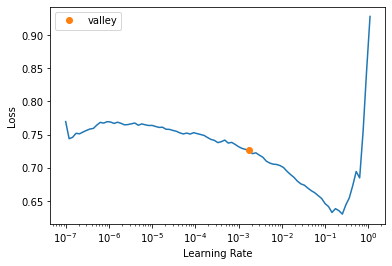

In [ ]:
# 6.1 select the appropriate learning rate
#       we typically find the point where the slope is steepest
learn.lr_find()

See [this StackOverflow answer](https://stackoverflow.com/a/62986041) as to why the suggested lr is not 0.1 but 0.002.

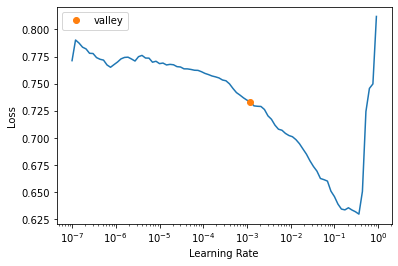

In [ ]:
lr_steepest = learn.lr_find()

In [ ]:
lr_steepest

SuggestedLRs(valley=0.0012022644514217973)

### Our model

In [ ]:
# 6.2 Embeddings
learn.embeds

ModuleList(
  (0): Embedding(10, 6)
  (1): Embedding(17, 8)
  (2): Embedding(8, 5)
  (3): Embedding(16, 8)
  (4): Embedding(7, 5)
  (5): Embedding(6, 4)
  (6): Embedding(3, 3)
)

In [ ]:
# 6.3 Drop outs in embedding layers
learn.emb_drop

Dropout(p=0.0, inplace=False)

In [ ]:
# 6.4 Batch Normalization
learn.bn_cont

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
# 6.5 Model layers:
learn.layers

Sequential(
  (0): LinBnDrop(
    (0): Linear(in_features=42, out_features=200, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): LinBnDrop(
    (0): Linear(in_features=200, out_features=100, bias=False)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): LinBnDrop(
    (0): Linear(in_features=100, out_features=2, bias=True)
  )
)

And we can train that model with the `fit_one_cycle` method (the `fine_tune` method won’t be useful here since we don’t have a pretrained model).

In [ ]:
# 6.2 Less the batch_size (bs), more the time:
#     On slice(), see this discussion:
#      https://forums.fast.ai/t/what-does-the-slice-lr-mean-in-fit-one-cycle/60896/6
learn.fit_one_cycle(10, slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.373135,0.382461,0.824785,00:05
1,0.369343,0.374231,0.823249,00:05
2,0.372333,0.361818,0.827703,00:06
3,0.351829,0.362337,0.828471,00:05
4,0.358259,0.355592,0.833231,00:05
5,0.361003,0.356740,0.832002,00:05
6,0.351200,0.355561,0.834306,00:04
7,0.349200,0.355742,0.832924,00:05
8,0.347066,0.356321,0.835534,00:05
9,0.336245,0.356475,0.835074,00:05


## Make predictions

### Directly from a DataFrame

In [ ]:
# 7.0 We can then have a look at some predictions:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,9.0,5.0,2.0,2.0,5.0,1.0,-0.993250,-1.034500,0.360500,0.0,0.0
1,5.0,12.0,5.0,7.0,2.0,5.0,1.0,-1.066548,-0.071559,-0.424213,0.0,0.0
2,7.0,10.0,3.0,5.0,1.0,5.0,1.0,0.839200,-1.434654,1.145213,1.0,1.0
3,6.0,10.0,3.0,11.0,1.0,5.0,1.0,0.106220,-0.856380,1.145213,0.0,1.0
4,5.0,16.0,3.0,8.0,1.0,5.0,1.0,0.326114,-0.038621,-0.031857,1.0,0.0
5,2.0,10.0,3.0,11.0,1.0,5.0,1.0,0.765902,-0.575086,1.145213,1.0,1.0
6,5.0,12.0,5.0,9.0,4.0,2.0,1.0,-1.433037,-0.881881,-0.424213,0.0,0.0
7,5.0,12.0,3.0,8.0,1.0,3.0,1.0,0.546008,2.963465,-0.424213,1.0,0.0
8,5.0,8.0,5.0,2.0,2.0,5.0,1.0,0.546008,0.392527,0.752856,0.0,0.0


In [ ]:
# 7.1 Make prediction for one row:
row, clas, probs = learn.predict(df.iloc[0])

In [ ]:
# 7.2 Show result of one row
row.show()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,101319.999696,12.0,>=50k


In [ ]:
# 7.3 Other information
clas, probs

(tensor(1), tensor([0.4005, 0.5995]))

### From Data Loader object

To get prediction on a new dataframe, you can use the test_dl method of the DataLoaders. That dataframe does not need to have the dependent variable in its column. About `test_dl` object , see [here](https://muellerzr.github.io/fastblog/2020/08/10/testdl.html)

In [ ]:
# 8.0
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)

In [ ]:
# 8.1 Transform test_df exactly in the manner
#      train was done using test_dl
dl = learn.dls.test_dl(test_df)

In [ ]:
# 8.2 Get predictions now:

learn.get_preds(dl=dl)

(tensor([[0.4005, 0.5995],
         [0.3844, 0.6156],
         [0.9888, 0.0112],
         ...,
         [0.5176, 0.4824],
         [0.6915, 0.3085],
         [0.6965, 0.3035]]), None)

### Get prediction from any arbitrary data

In [ ]:
# 9.0
test_data = {
    'age': [49], 
    'workclass': ['Private'], 
    'fnlwgt': [101320],
    'education': ['Assoc-acdm'], 
    'education-num': [12.0],
    'marital-status': ['Married-civ-spouse'], 
    'occupation': [''],
    'relationship': ['Wife'],
    'race': ['White'],
}

# 9.1
input = pd.DataFrame(test_data)

In [ ]:
# 9.2
tdl = learn.dls.test_dl(input)

In [ ]:
# 9.3
learn.get_preds(dl=tdl)

(tensor([[0.7156, 0.2844]]), None)

## USing fastai pre-processing with sklearn and other libraries

As mentioned earlier, `TabularPandas` is a powerful and easy preprocessing tool for tabular data. Integration with libraries such as `Random Forests` and `XGBoost` requires only one extra step, that the .dataloaders call did for us. Let’s look at our `to` object again. Its values are stored in a DataFrame like object, where we can extract the `cats`, `conts`, `xs` and `ys` if we want to:

In [ ]:
# 10.0
to.xs[:3]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
19042,8,13,3,5,1,3,1,-0.773356,-1.052961,1.537569
20852,5,16,3,4,1,5,1,-0.113674,-1.496425,-0.031857
25104,7,16,1,9,2,5,1,0.619306,-0.297038,-0.031857


Now that everything is encoded, you can then send this off to `XGBoost` or `Random Forests` by extracting the train and validation sets and their values:

In [ ]:
# 10.1 Get split and pre-processed data:

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
# 10.2
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(26049, 10)

(6512, 10)

(26049,)

(6512,)

In [ ]:
###########################